In [1]:
import numpy as np
import uproot   
from kdtree import getDtoM_chunk, getDtoMwJCM     
from kdtree import dataSel  
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from getQuantilePlots import getDataForQuantPlot, getDataForPlot, getQuantile, getUprootBranch

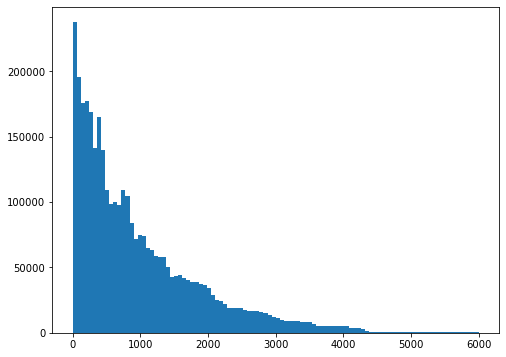

3535404
46382
1.3119292731467183


In [28]:
wkdt3bfn = 'root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wkdtwJCM/data2018_picoAOD_3b_wJCM_newSBDef_wkdt.root'
wkdt3b = (uproot.open(wkdt3bfn)['Events']).arrays()
plt.figure(figsize=(8,6))
plt.hist(wkdt3b['wkdt'], bins=100)
plt.show()
print(len(wkdt3b['wkdt']))
print(len(np.where(wkdt3b['wkdt']==0)[0]))
print(len(np.where(wkdt3b['wkdt']==0)[0])*100/len(wkdt3b['wkdt']))

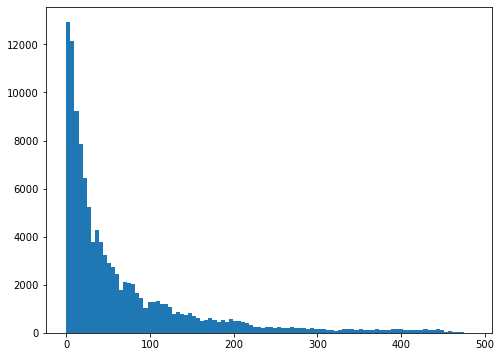

115764
578
0.49929166234753464


In [31]:
wkdt3bfn = 'root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wkdtwJCM/mixed2016_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_wkdt.root'
wkdt3b = (uproot.open(wkdt3bfn)['Events']).arrays()
plt.figure(figsize=(8,6))
plt.hist(wkdt3b['wkdt'], bins=100)
plt.show()
print(len(wkdt3b['wkdt']))
print(len(np.where(wkdt3b['wkdt']==0)[0]))
print(len(np.where(wkdt3b['wkdt']==0)[0])*100/len(wkdt3b['wkdt']))

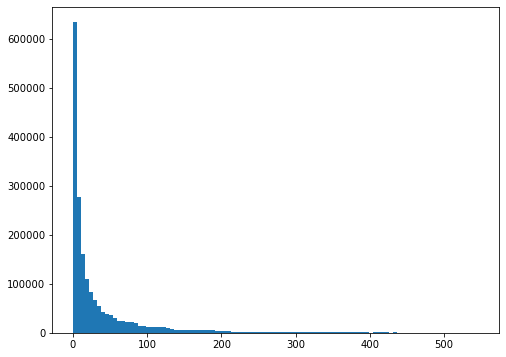

In [23]:
wkdt3bfn = 'root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wkdtwJCM/picoAOD_3b_wJCM_v0_newSBDef_TTToHadronic2017_wkdt.root'
wkdt3b = (uproot.open(wkdt3bfn)['Events']).arrays()
plt.figure(figsize=(8,6))
plt.hist(wkdt3b['wkdt'], bins=100)
plt.show()

In [2]:
EOSwDtoMpath = "root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoMwJCM/"
EOSw3to4path = "root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/"
year='2018'
wFilename4b = EOSwDtoMpath+"mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_wDtoM.root"
filename4b = "root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef.root"
wFilename3b = EOSwDtoMpath+"data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root"
filename3b = "root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"data"+year+"_picoAOD_3b_wJCM_newSBDef.root"
outputfileL =  EOSw3to4path+"data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4SBL.root"
outputfileU =  EOSw3to4path+"data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4SBU.root"
outputfile =  EOSw3to4path+"data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4SR.root"

In [3]:
b3 = (uproot.open(filename3b)['Events']).arrays()
b3w = (uproot.open(wFilename3b)['Events']).arrays()
b3to4 = (uproot.open(outputfile)['Events']).arrays()
b3to4L = (uproot.open(outputfileL)['Events']).arrays()
b3to4U = (uproot.open(outputfileU)['Events']).arrays()
b4 = (uproot.open(filename4b)['Events']).arrays()
b4w = (uproot.open(wFilename4b)['Events']).arrays()

In [14]:
# for i in range(14):
#     print(i, len(b3[(b3['m4j']<=1800)&(b3['nSelJets']==i)]))
    
# for i in range(14):
#     print(i, len(b4[(b4['m4j']<=1800)&(b4['nSelJets']==i)]))

int(35/5)

7

In [29]:
(b3['SR']==i-1) | (b3['SR']==i+1)

<Array [False, False, False, ... False, False] type='120000 * bool'>

In [31]:
print('ratios for SBU')
for i in range(10):
    if i == 0:
        a = np.sum(b3['weight'][(b3['SR']==i+1)]*b3w['wDtoM'][(b3['SR']==i+1)])
        b = np.sum(b4['weight'][(b4['SR']==i+1)]*b4w['wDtoM'][(b4['SR']==i+1)])
        c = np.sum(b3['weight'][(b3['SR']==i+1)]*b3w['wDtoM'][(b3['SR']==i+1)])
        d = np.sum(b4['weight'][(b4['SR']==i+1)]*b4w['wDtoM'][(b4['SR']==i+1)])
    elif i==9:
        a = np.sum(b3['weight'][(b3['SR']==i-1)]*b3w['wDtoM'][(b3['SR']==i-1)])
        b = np.sum(b4['weight'][(b4['SR']==i-1)]*b4w['wDtoM'][(b4['SR']==i-1)])
        c, d = 0,1
    else:
        a = np.sum(b3['weight'][(b3['SR']==i-1)|(b3['SR']==i+1)]*b3w['wDtoM'][(b3['SR']==i-1)|(b3['SR']==i+1)])
        b = np.sum(b4['weight'][(b4['SR']==i-1)|(b4['SR']==i+1)]*b4w['wDtoM'][(b4['SR']==i-1)|(b4['SR']==i+1)])
        c = np.sum(b3['weight'][(b3['SR']==i+1)]*b3w['wDtoM'][(b3['SR']==i+1)])
        d = np.sum(b4['weight'][(b4['SR']==i+1)]*b4w['wDtoM'][(b4['SR']==i+1)])
    print( (b*c/a)/d )#,b*c/a, d)

ratios for SBU
1.0
1.0529301780092806
1.063081716004
1.0437625376724275
1.0446850594496926
1.0324055357701225
1.0458110250392734
1.056651970564405
1.0824101826375487
0.0


In [32]:
print('ratios for SBL')
for i in range(10):
    if i == 0:
        a = np.sum(b3['weight'][(b3['SR']==i+1)]*b3w['wDtoM'][(b3['SR']==i+1)])
        b = np.sum(b4['weight'][(b4['SR']==i+1)]*b4w['wDtoM'][(b4['SR']==i+1)])
        c,d = 0,1
    elif i==9:
        a = np.sum(b3['weight'][(b3['SR']==i-1)]*b3w['wDtoM'][(b3['SR']==i-1)])
        b = np.sum(b4['weight'][(b4['SR']==i-1)]*b4w['wDtoM'][(b4['SR']==i-1)])
        c = np.sum(b3['weight'][(b3['SR']==i-1)]*b3w['wDtoM'][(b3['SR']==i-1)])
        d = np.sum(b4['weight'][(b4['SR']==i-1)]*b4w['wDtoM'][(b4['SR']==i-1)])
    else:
        a = np.sum(b3['weight'][(b3['SR']==i-1)|(b3['SR']==i+1)]*b3w['wDtoM'][(b3['SR']==i-1)|(b3['SR']==i+1)])
        b = np.sum(b4['weight'][(b4['SR']==i-1)|(b4['SR']==i+1)]*b4w['wDtoM'][(b4['SR']==i-1)|(b4['SR']==i+1)])
        c = np.sum(b3['weight'][(b3['SR']==i-1)]*b3w['wDtoM'][(b3['SR']==i-1)])
        d = np.sum(b4['weight'][(b4['SR']==i-1)]*b4w['wDtoM'][(b4['SR']==i-1)])
    print((b*c/a)/d )#,b*c/a, d)

ratios for SBL
0.0
0.9301431135297942
0.9239838064822736
0.9508168578790638
0.953307669845051
0.9664980021216395
0.955394126106974
0.9463015354595321
0.9265518597965835
1.0


In [33]:
print('ratios for SR')
for i in range(10):
    if i == 0:
        a = np.sum(b3['weight'][(b3['SR']==i+1)]*b3w['wDtoM'][(b3['SR']==i+1)])
        b = np.sum(b4['weight'][(b4['SR']==i+1)]*b4w['wDtoM'][(b4['SR']==i+1)])
    elif i==9:
        a = np.sum(b3['weight'][(b3['SR']==i-1)]*b3w['wDtoM'][(b3['SR']==i-1)])
        b = np.sum(b4['weight'][(b4['SR']==i-1)]*b4w['wDtoM'][(b4['SR']==i-1)])
    else:
        a = np.sum(b3['weight'][(b3['SR']==i-1)|(b3['SR']==i+1)]*b3w['wDtoM'][(b3['SR']==i-1)|(b3['SR']==i+1)])
        b = np.sum(b4['weight'][(b4['SR']==i-1)|(b4['SR']==i+1)]*b4w['wDtoM'][(b4['SR']==i-1)|(b4['SR']==i+1)])
    c = np.sum(b3['weight'][b3['SR']==i]*b3w['wDtoM'][b3['SR']==i])
    d = np.sum(b4['weight'][b4['SR']==i]*b4w['wDtoM'][b4['SR']==i])
    print((b*c/a)/d )#,b*c/a, d)
    

ratios for SR
0.9712234256158044
0.9577025110777537
1.0158587062095383
0.9950163449907106
1.0000105401980597
1.0096753806259664
0.9769022832106601
1.013051761474655
0.9664292445027927
1.1200097563215048


In [34]:
for i in range(10):
    a = np.sum(b3['weight'][b3['SR']==i]*b3w['wDtoM'][b3['SR']==i])
    b = np.sum(b4['weight'][b4['SR']==i]*b4w['wDtoM'][b4['SR']==i])
    print(b/a)
    

0.05980808942047782
0.05808701748649282
0.052833591124730066
0.050486677285841
0.04812882939418995
0.046070666222542876
0.04505634253427256
0.04208756920802161
0.04035092661550471
0.0360272992157059


In [16]:
for i in range(10):
    a = np.sum(b3['weight'][b3['SR']==i]*b3w['wDtoM'][b3['SR']==i])
    b = np.sum(b4['weight'][b4['SR']==i]*b4w['wDtoM'][b4['SR']==i])
    print(i, a/b)
    

0 4.105433605642208
1 4.662093931054513
2 5.10846019176927
3 5.209842168580947
4 5.440717002829554
5 5.773328651668514
6 5.662302105807949
7 6.032111990952182
8 6.57528890217523
9 7.614290397554739


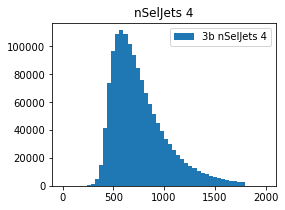

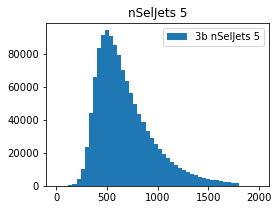

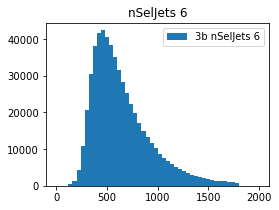

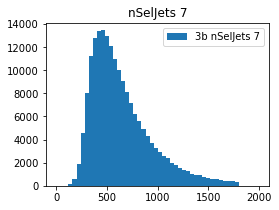

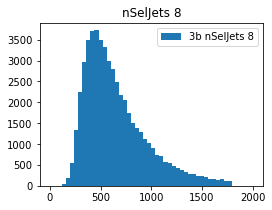

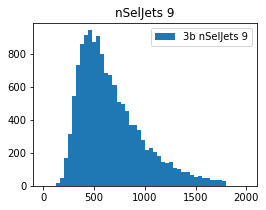

In [35]:
for i in range(4,10):
    plt.figure(figsize=(4,3))
    plt.title('nSelJets '+str(i));
    plt.hist(b3['m4j'][b3['nSelJets']==i], weights = b3['weight'][b3['nSelJets']==i]*b3w['wDtoM'][b3['nSelJets']==i], range=(0,2000), bins=50, label='3b nSelJets '+ str(i)); 
    plt.legend();plt.show(); plt.close()
    
    

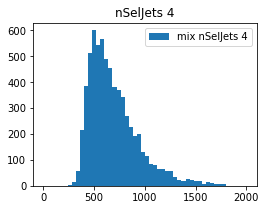

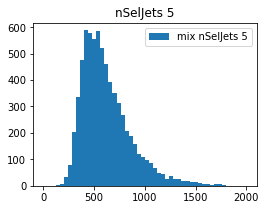

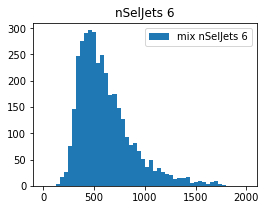

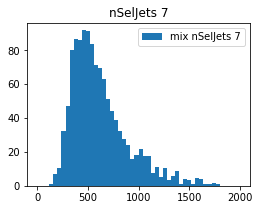

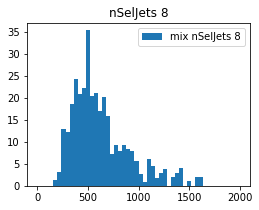

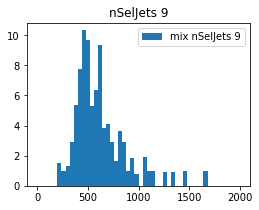

In [21]:
for i in range(4,10):
    plt.figure(figsize=(4,3))
    plt.title('nSelJets '+str(i));
    plt.hist(b4['m4j'][b4['nSelJets']==i], weights = b4['weight'][b4['nSelJets']==i]*b4w['wDtoM'][b4['nSelJets']==i], range=(0,2000), bins=50, label='mix nSelJets '+ str(i)); 
    plt.legend();plt.show(); plt.close()
    
    

(<Array [] type='0 * int64'>,)


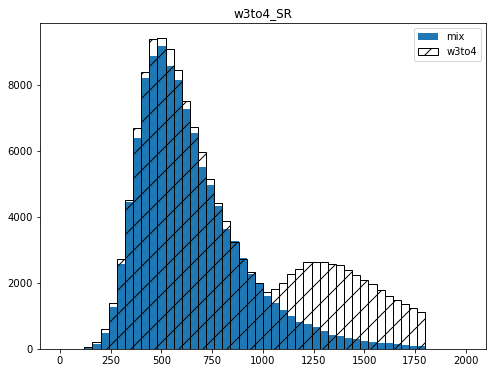

In [4]:
plt.figure(figsize=(8,6))
sel = np.where(~(np.isinf(b3to4['w3to4']) |  np.isnan(b3to4['w3to4'])))[0]
print(np.where((np.isinf(b3to4L['w3to4']) |  np.isnan(b3to4L['w3to4']))))
# plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel], range=(0,2000), bins=50, hatch='/', fill=True,label='w3to4')
plt.hist(b4['m4j'], weights = b4['weight']*b4w['wDtoM'], range=(0,2000), bins=50, label='mix')
plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel]*b3to4['w3to4'][sel], range=(0,2000), bins=50, hatch='/', fill=False,label='w3to4')
plt.title('w3to4_SR')
plt.legend()
plt.show()

(<Array [] type='0 * int64'>,)


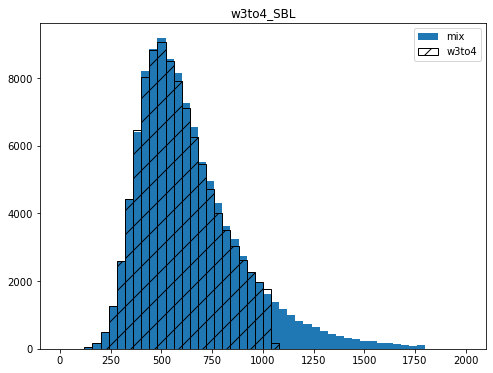

In [6]:
plt.figure(figsize=(8,6))
sel = np.where(~(np.isinf(b3to4L['w3to4']) |  np.isnan(b3to4L['w3to4'])))[0]
print(np.where((np.isinf(b3to4L['w3to4']) |  np.isnan(b3to4L['w3to4']))))
# plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel])
plt.hist(b4['m4j'], weights = b4['weight']*b4w['wDtoM'], range=(0,2000), bins=50, label='mix')
plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel]*b3to4L['w3to4'][sel], range=(0,2000), bins=50, hatch='/', fill=False,label='w3to4')
plt.title('w3to4_SBL')
plt.legend()
plt.show()

(<Array [] type='0 * int64'>,)


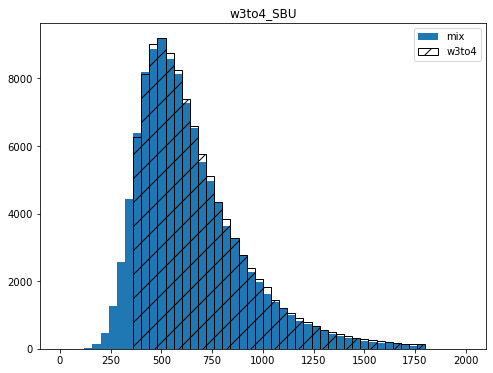

In [7]:
plt.figure(figsize=(8,6))
sel = np.where(~(np.isinf(b3to4U['w3to4']) |  np.isnan(b3to4U['w3to4'])))[0]
print(np.where((np.isinf(b3to4L['w3to4']) |  np.isnan(b3to4L['w3to4']))))
# plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel])
plt.hist(b4['m4j'], weights = b4['weight']*b4w['wDtoM'], range=(0,2000), bins=50, label='mix')
plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel]*b3to4U['w3to4'][sel], range=(0,2000), bins=50, hatch='/', fill=False,label='w3to4')
plt.title('w3to4_SBU')
plt.legend()
plt.show()

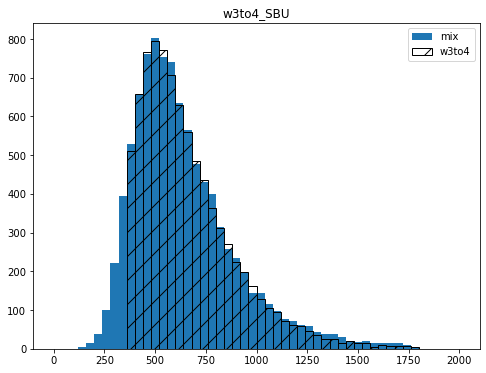

In [11]:
plt.figure(figsize=(8,6))
sel = np.where(~(np.isinf(b3to4U['w3to4']) |  np.isnan(b3to4U['w3to4'])))[0]
# plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel])
plt.hist(b4['m4j'], weights = b4['weight']*b4w['wDtoM'], range=(0,2000), bins=50, label='mix')
plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel]*b3to4U['w3to4'][sel], range=(0,2000), bins=50, hatch='/', fill=False,label='w3to4')
plt.title('w3to4_SBU')
plt.legend()
plt.show()

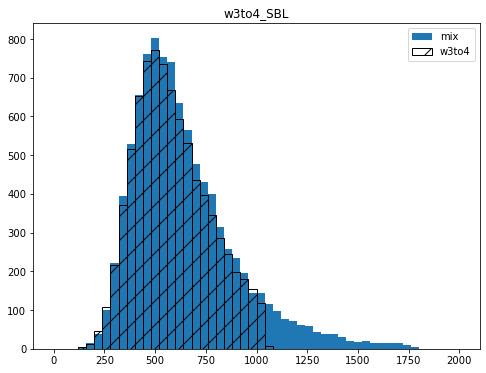

In [12]:
plt.figure(figsize=(8,6))
sel = np.where(~(np.isinf(b3to4L['w3to4']) |  np.isnan(b3to4L['w3to4'])))[0]
# plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel])
plt.hist(b4['m4j'], weights = b4['weight']*b4w['wDtoM'], range=(0,2000), bins=50, label='mix')
plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel]*b3to4L['w3to4'][sel], range=(0,2000), bins=50, hatch='/', fill=False,label='w3to4')
plt.title('w3to4_SBL')
plt.legend()
plt.show()

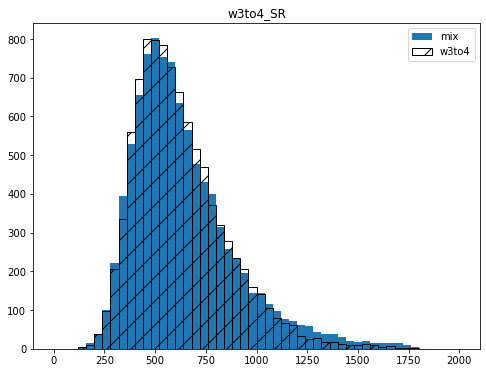

In [13]:
plt.figure(figsize=(8,6))
sel = np.where(~(np.isinf(b3to4['w3to4']) |  np.isnan(b3to4['w3to4'])))[0]
# plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel])
plt.hist(b4['m4j'], weights = b4['weight']*b4w['wDtoM'], range=(0,2000), bins=50, label='mix')
plt.hist(b3['m4j'][sel], weights = b3['weight'][sel]*b3w['wDtoM'][sel]*b3to4['w3to4'][sel], range=(0,2000), bins=50, hatch='/', fill=False,label='w3to4')
plt.title('w3to4_SR')
plt.legend()
plt.show()

In [39]:
b3to4['w3to4'][sel]

<Array [nan, nan, nan, nan, ... nan, nan, nan] type='3738 * float64'>

In [33]:
np.isnan(b3to4['w3to4'])==True 

<Array [False, False, False, ... False, False] type='60000 * bool'>

In [3]:
yearArr = ['2016','2017','2018']
ttyearArr = ['2016_preVFP','2016_postVFP','2017','2018']
ttArr = ['TTTo2L2Nu','TTToHadronic','TTToSemiLeptonic']
m4jBinEdges = np.array([[0, 361], [361, 425], [425, 479], [479, 533], [533, 591], [591, 658], [658, 741], [741, 854], [854, 1044], [1044, 1800]])
# dataFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef.root" for year in ['2016','2017','2018']]
# wDtoM4bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoM/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_wDtoM.root" for year in ['2016','2017','2018']]
# pullFilename = ["../jetPairing/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_pull.root" for year in ['2016','2017','2018']]

# data3bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"data"+year+"_picoAOD_3b_wJCM_newSBDef.root" for year in yearArr]
# wDtoMFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoM/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root" for year in yearArr]
# w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4.root" for year in yearArr]


In [4]:
yearArr = ['2016','2017','2018']
m4jBinEdges = np.array([[0, 361], [361, 425], [425, 479], [479, 533], [533, 591], [591, 658], [658, 741], [741, 854], [854, 1044], [1044, 1800]])
dataFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef.root" for year in ['2016','2017','2018']]
wDtoM4bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoMwJCM/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_wDtoM.root" for year in ['2016','2017','2018']]
pullFilename = ["../jetPairing/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_pull.root" for year in ['2016','2017','2018']]
tt4bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+ttProcess+ttYear+"_4b_noPSData_wTrigW_picoAOD_4b_wJCM_newSBDef.root" for ttYear in ttyearArr for ttProcess in ttArr]

data3bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"data"+year+"_picoAOD_3b_wJCM_newSBDef.root" for year in yearArr]
wDtoM3bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoMwJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root" for year in yearArr]
w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4.root" for year in yearArr]
w3to4LFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4SBL.root" for year in yearArr]
w3to4UFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4SBU.root" for year in yearArr]
pull3bFilename = ["../jetPairing/data"+year+"_picoAOD_3b_wJCM_newSBDef_pull.root" for year in yearArr]


In [5]:
dataMixed = getUprootBranch(dataFilename, vn = '0', closure = 'SR')
datatt4b = getUprootBranch(tt4bFilename, vn = '0', closure = 'SR')
# arrayNames = ['pullSR'+str(i) for i in range(len(m4jBinEdges))]
# pullAssign = uproot.concatenate(pullFilename, filter_name=arrayNames)
# wDtoM4b = uproot.concatenate(wDtoM4bFilename, filter_name=['wDtoM'])['wDtoM']

In [6]:
data3b = getUprootBranch(data3bFilename, vn = '0', closure = 'SR')
# arrayNames = ['pullSR'+str(i) for i in range(len(m4jBinEdges))]
# pullAssign3b = uproot.concatenate(pull3bFilename, filter_name=arrayNames)


In [7]:
wDtoM3b = uproot.concatenate(wDtoM3bFilename, filter_name=['wDtoM'])['wDtoM']
w3to4 = uproot.concatenate(w3to4Filename, filter_name=['w3to4'])['w3to4']
w3to4L = uproot.concatenate(w3to4LFilename, filter_name=['w3to4'])['w3to4']
w3to4U = uproot.concatenate(w3to4UFilename, filter_name=['w3to4'])['w3to4']

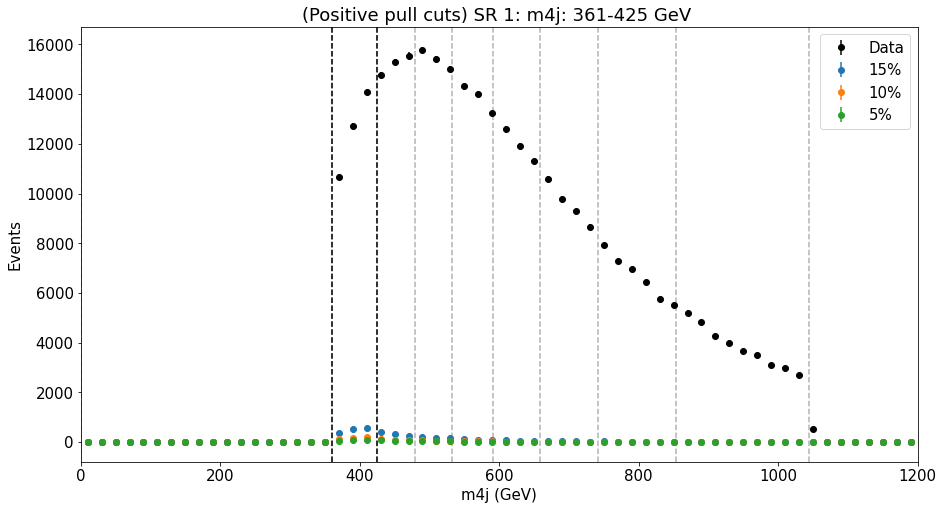

In [22]:
a=m4jSelPlot(dataMixed, pullAssign, 1, m4jBinEdges)

In [49]:
pullAssign['pullSR0']>5

<Array [False, False, False, ... False, False] type='390611 * bool'>

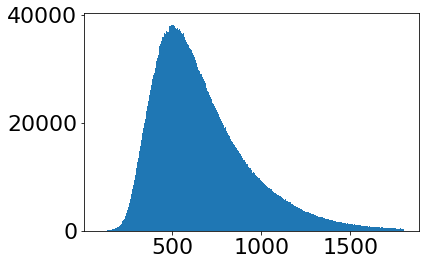

In [13]:
plt.hist(m4j3b, bins=700, weights = weight3b); plt.show()

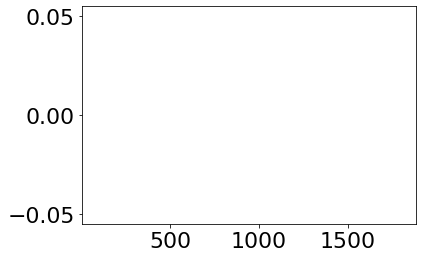

In [26]:
wSBL = np.array(wSBL)
wSBL[np.where(np.isnan(wSBL)==True)] = 0
wSBL[np.where(np.isinf(wSBL)==True)] = 0
plt.hist(m4j3b, bins=700, weights = weight3b*wSBL); plt.show()

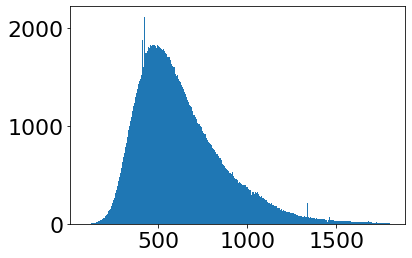

In [25]:
wSR = np.array(wSR)
wSR[np.where(np.isnan(wSR)==True)] = 0
wSR[np.where(np.isinf(wSR)==True)] = 0
plt.hist(m4j3b, bins=700, weights = weight3b*wSR); plt.show()

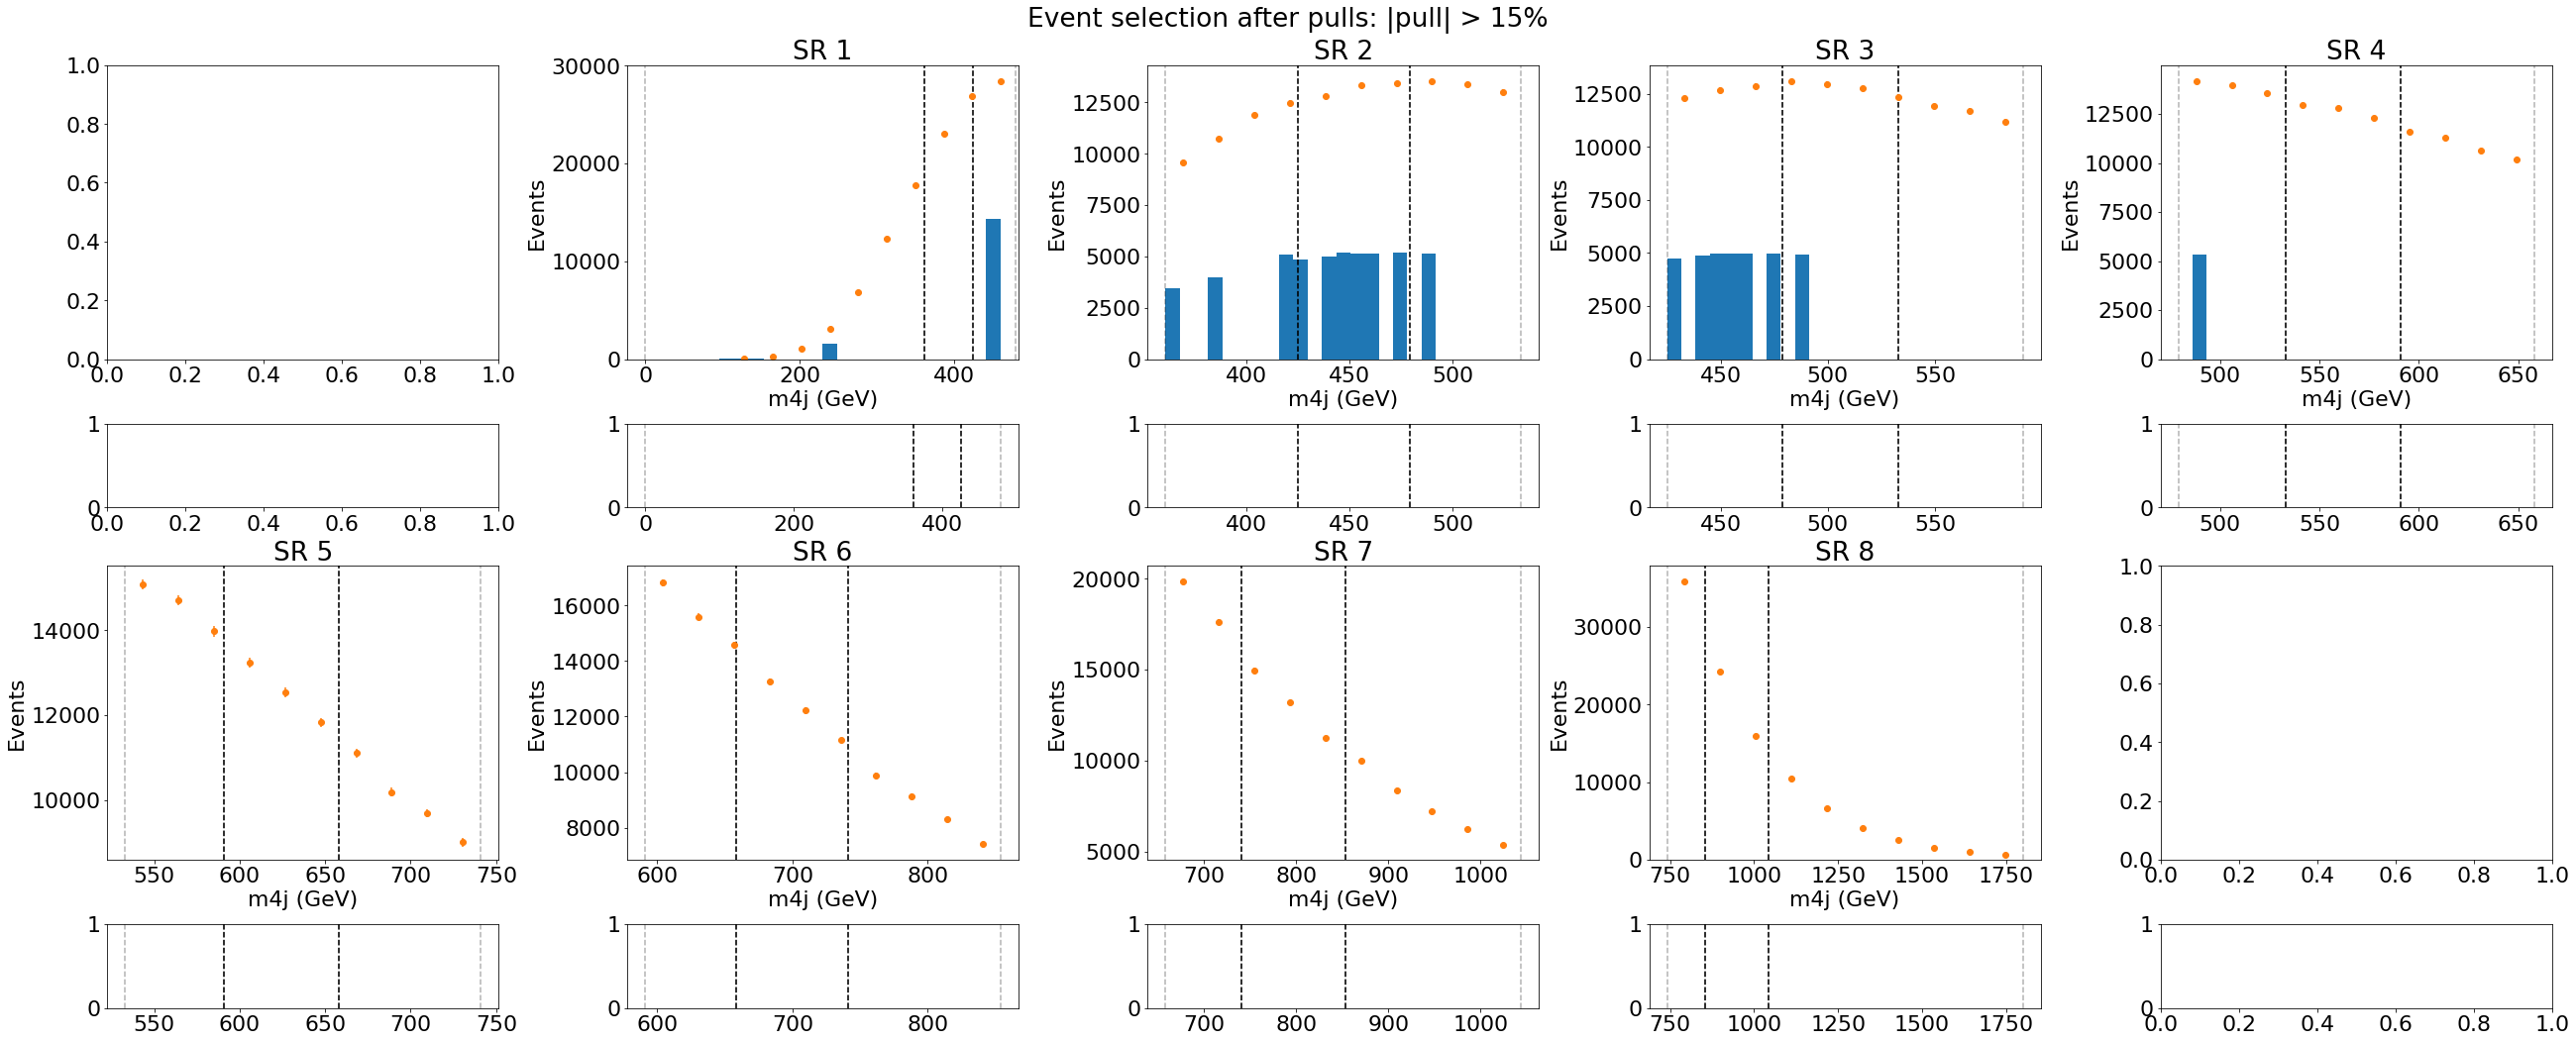

In [11]:

# def m4jSubplot(dataMixed, pullAssign, m4jBinEdges,data3b,  percent=15, dijetLim=1000, title=''):#, data4b, data3b):
percent=15; dijetLim=1000; title='';
mixPass = getQuantile.dataSel(dataMixed, [0,1800], dijetLim=dijetLim)
m4j = dataMixed['m4j'][mixPass]; mixWeight = dataMixed['weight'][mixPass]; 
SRno = dataMixed['SR'][mixPass]

# data3b = dataMix; pull3b = pullAssign
pass3b = getQuantile.dataSel(data3b, [0,1800], dijetLim=dijetLim)
m4j3b = data3b['m4j'][pass3b]; weight3b = data3b['weight'][pass3b]*wDtoM3b[pass3b]####multiply dToM; 
SRno3b = data3b['SR'][pass3b]
wSR = w3to4[pass3b]; wSBL = w3to4L[pass3b]; wSBU = w3to4U[pass3b]

wSR[np.isnan(WSR)==True]=0

plt.rcParams.update({'font.size': 22})
figf, axs = plt.subplots(4, 5, figsize=(36,14.5), gridspec_kw={'width_ratios': [1,1,1,1,1], 'height_ratios': [7,2, 7,2]}, constrained_layout=True)
figf.suptitle('Event selection after pulls: |pull| > '+str(percent)+'%')
bins = 10
for SR in range(len(m4jBinEdges)):

    i,j = (int(SR/5)*2), SR%5
    if SR == 0:
        continue
#         bincount, binbound = np.histogram(m4j[(SRno==SR) | (SRno==int(SR+1))], bins=bins, weights = mixWeight[(SRno==SR) | (SRno==int(SR+1))])
    elif SR == 9:
        continue
#         bincount, binbound = np.histogram(m4j[(SRno==int(SR-1)) | (SRno==SR)], bins=bins, weights = mixWeight[(SRno==int(SR-1)) | (SRno==SR)])
    else:    
        m4j3bSel = m4j3b[(SRno3b==int(SR-1)) | (SRno3b==SR) | (SRno3b==int(SR+1))]
        wtemp = np.zeros(len(m4j3b))
#         wtemp[(SRno3b==int(SR-1))] = weight3b[(SRno3b==int(SR-1))]*wSBL[(SRno3b==int(SR-1))]
#         wtemp[(SRno3b==int(SR+1))] = weight3b[(SRno3b==int(SR+1))]*wSBU[(SRno3b==int(SR+1))]
#         wtemp[(SRno3b==int(SR))] = weight3b[(SRno3b==int(SR))]*wSR[(SRno3b==SR)]
        wtemp = weight3b*w3to4[pass3b]
        m = axs[i, j].hist(m4j3bSel, bins=25, range = (m4jBinEdges[SR-1][0],m4jBinEdges[SR+1][1]) , weights = wtemp[(SRno3b==int(SR-1)) | (SRno3b==SR) | (SRno3b==int(SR+1))])
        bincount, binbound = np.histogram(m4j[(SRno==int(SR-1)) | (SRno==SR) | (SRno==int(SR+1))], bins=bins, weights = mixWeight[(SRno==int(SR-1)) | (SRno==SR) | (SRno==int(SR+1))])

    bincenter = 0.5*(binbound[:-1] + binbound[1:])
    axs[i, j].errorbar(bincenter, bincount, yerr=np.sqrt(bincount), marker='o', label=str(percent)+'%', ls='none')
#         axs[i, j].title('(Absolute pull cuts) SR '+str(SR) + ': m4j: '+str(m4jBinEdges[SR][0])+'-'+str(m4jBinEdges[SR][1])+' GeV ' + title)

    axs[i, j].set_title('SR '+ str(SR))#+": selection "+ str(np.round(percent,0)) +"%" )
    axs[i, j].set_xlabel('m4j (GeV)'); axs[i, j].set_ylabel('Events')
    for s in range(2):
        axs[i, j].axvline(m4jBinEdges[SR][s],color='k',linestyle='--')
        axs[i+1, j].axvline(m4jBinEdges[SR][s],color='k',linestyle='--')
        if SR > 0:
            axs[i, j].axvline(m4jBinEdges[SR-1][s],color='k',linestyle='--', alpha=0.3)
            axs[i+1, j].axvline(m4jBinEdges[SR-1][s],color='k',linestyle='--', alpha=0.3)
        if SR < 9:
            axs[i, j].axvline(m4jBinEdges[SR+1][s],color='k',linestyle='--', alpha=0.3)
            axs[i+1, j].axvline(m4jBinEdges[SR+1][s],color='k',linestyle='--', alpha=0.3)
#     axs[i, j].set_xlim(left=0, right=ulim); axs[i, j].set_ylim(bottom=0, top=ulim)
plt.savefig('test.jpg'); plt.show();plt.close()



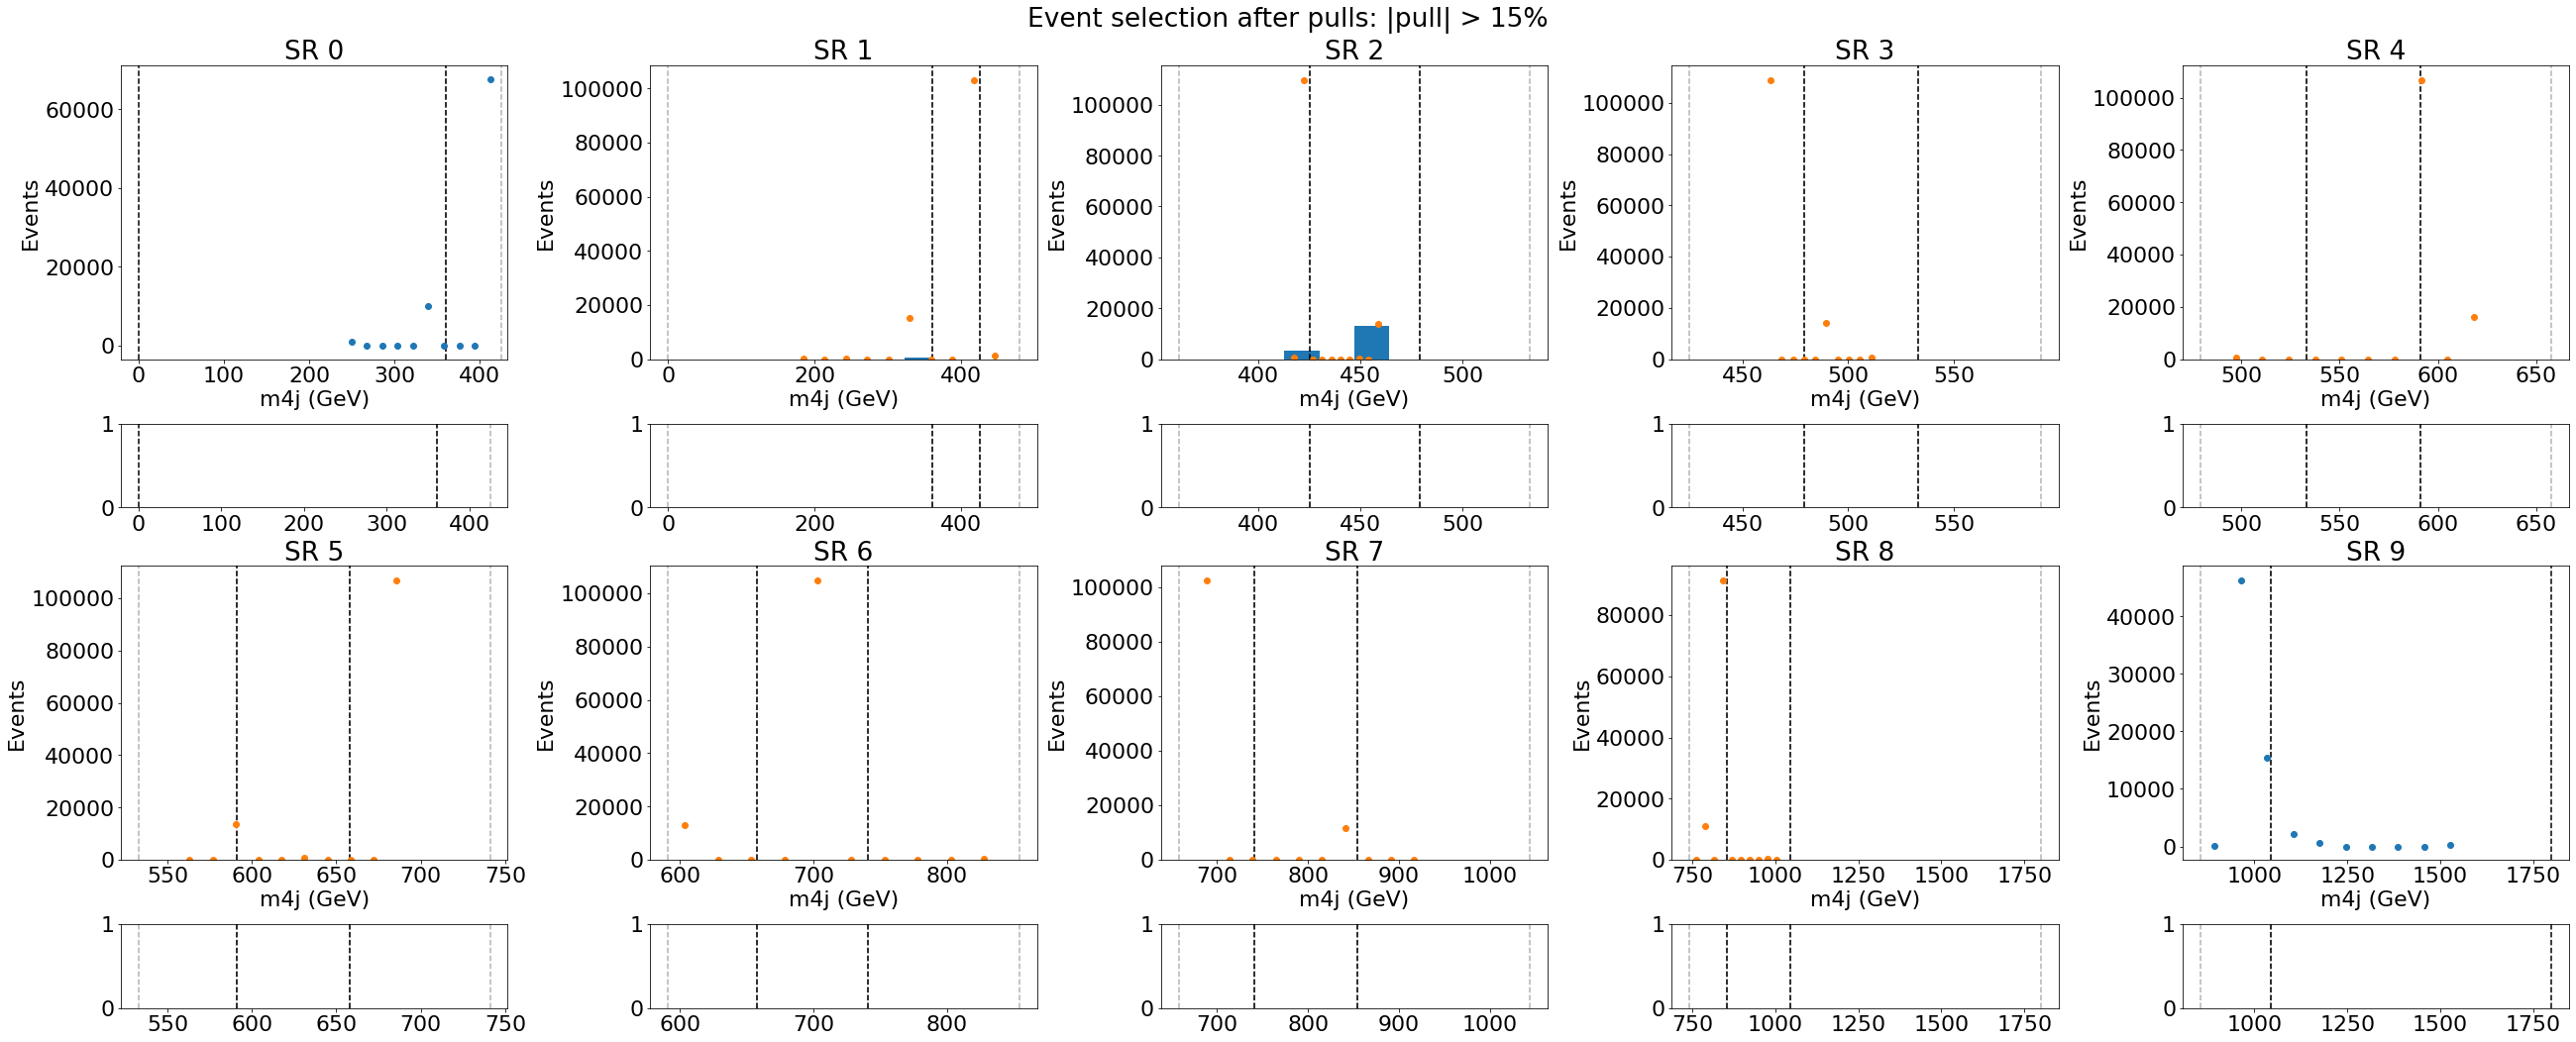

In [58]:

# def m4jSubplot(dataMixed, pullAssign, m4jBinEdges,data3b,  percent=15, dijetLim=1000, title=''):#, data4b, data3b):
percent=15; dijetLim=1000; title='';
mixPass = getQuantile.dataSel(dataMixed, [0,1800], dijetLim=dijetLim)
m4j = dataMixed['m4j'][mixPass]; mixWeight = dataMixed['weight'][mixPass]; 
SRno = dataMixed['SR'][mixPass]

# data3b = dataMix; pull3b = pullAssign
pass3b = getQuantile.dataSel(data3b, [0,1800], dijetLim=dijetLim)
m4j3b = data3b['m4j'][pass3b]; weight3b = data3b['weight'][pass3b]*wDtoM3b[pass3b]####multiply dToM; 
SRno3b = data3b['SR'][pass3b]
wSR = w3to4[pass3b]; wSBL = w3to4L[pass3b]; wSBU = w3to4U[pass3b]


plt.rcParams.update({'font.size': 22})
figf, axs = plt.subplots(4, 5, figsize=(36,14.5), gridspec_kw={'width_ratios': [1,1,1,1,1], 'height_ratios': [7,2, 7,2]}, constrained_layout=True)
figf.suptitle('Event selection after pulls: |pull| > '+str(percent)+'%')
bins = 10
for SR in range(len(m4jBinEdges)):

    i,j = (int(SR/5)*2), SR%5
#     pullVal = np.loadtxt('quantileData/pullArrAbs'+str(percent)+'.txt')[SR]
#     pullVal=0
    if SR == 0:
        pulSel = abs(pullAssign['pullSR'+str(SR)][mixPass][(SRno==SR) | (SRno==int(SR+1))])>=pullVal
        pul3b = abs(pullAssign3b['pullSR'+str(SR)][pass3b][ (SRno3b==SR) | (SRno3b==int(SR+1))])>=pullVal
        bincount, binbound = np.histogram(m4j[(SRno==SR) | (SRno==int(SR+1))][pulSel], bins=bins, weights = mixWeight[(SRno==SR) | (SRno==int(SR+1))][pulSel])
    elif SR == 9:
        pulSel = abs(pullAssign['pullSR'+str(SR)][mixPass][(SRno==SR) | (SRno==int(SR-1))])>=pullVal
        pul3b = abs(pullAssign3b['pullSR'+str(SR)][pass3b][(SRno3b==int(SR-1)) | (SRno3b==SR)])>=pullVal
        bincount, binbound = np.histogram(m4j[(SRno==int(SR-1)) | (SRno==SR)][pulSel], bins=bins, weights = mixWeight[(SRno==int(SR-1)) | (SRno==SR)][pulSel])
    else:    
        pulSel = abs(pullAssign['pullSR'+str(SR)][mixPass][(SRno==int(SR-1)) | (SRno==SR) | (SRno==int(SR+1))])>=pullVal
        pul3b = abs(pullAssign3b['pullSR'+str(SR)][pass3b][(SRno3b==int(SR-1)) | (SRno3b==SR) | (SRno3b==int(SR+1))])>=pullVal
        m4j3bSel = m4j3b[(SRno3b==int(SR-1)) | (SRno3b==SR) | (SRno3b==int(SR+1))]
        wtemp = np.zeros(len(m4j3b))
        wtemp[(SRno3b==int(SR-1))] = weight3b[(SRno3b==int(SR-1))]*wSBL[(SRno3b==int(SR-1))]
        wtemp[(SRno3b==int(SR+1))] = weight3b[(SRno3b==int(SR+1))]*wSBU[(SRno3b==int(SR+1))]
        wtemp[(SRno3b==int(SR))] = weight3b[(SRno3b==int(SR))]*wSR[(SRno3b==SR)]
        axs[i, j].hist(m4j3bSel[pul3b], bins=bins, weights = wtemp[(SRno3b==int(SR-1)) | (SRno3b==SR) | (SRno3b==int(SR+1))][pul3b])
        bincount, binbound = np.histogram(m4j[(SRno==int(SR-1)) | (SRno==SR) | (SRno==int(SR+1))][pulSel], bins=bins, weights = mixWeight[(SRno==int(SR-1)) | (SRno==SR) | (SRno==int(SR+1))][pulSel])

    bincenter = 0.5*(binbound[:-1] + binbound[1:])
    axs[i, j].errorbar(bincenter, bincount, yerr=np.sqrt(bincount), marker='o', label=str(percent)+'%', ls='none')
#         axs[i, j].title('(Absolute pull cuts) SR '+str(SR) + ': m4j: '+str(m4jBinEdges[SR][0])+'-'+str(m4jBinEdges[SR][1])+' GeV ' + title)

    axs[i, j].set_title('SR '+ str(SR))#+": selection "+ str(np.round(percent,0)) +"%" )
    axs[i, j].set_xlabel('m4j (GeV)'); axs[i, j].set_ylabel('Events')
    for s in range(2):
        axs[i, j].axvline(m4jBinEdges[SR][s],color='k',linestyle='--')
        axs[i+1, j].axvline(m4jBinEdges[SR][s],color='k',linestyle='--')
        if SR > 0:
            axs[i, j].axvline(m4jBinEdges[SR-1][s],color='k',linestyle='--', alpha=0.3)
            axs[i+1, j].axvline(m4jBinEdges[SR-1][s],color='k',linestyle='--', alpha=0.3)
        if SR < 9:
            axs[i, j].axvline(m4jBinEdges[SR+1][s],color='k',linestyle='--', alpha=0.3)
            axs[i+1, j].axvline(m4jBinEdges[SR+1][s],color='k',linestyle='--', alpha=0.3)
#     axs[i, j].set_xlim(left=0, right=ulim); axs[i, j].set_ylim(bottom=0, top=ulim)
plt.savefig('test.jpg'); plt.show();plt.close()



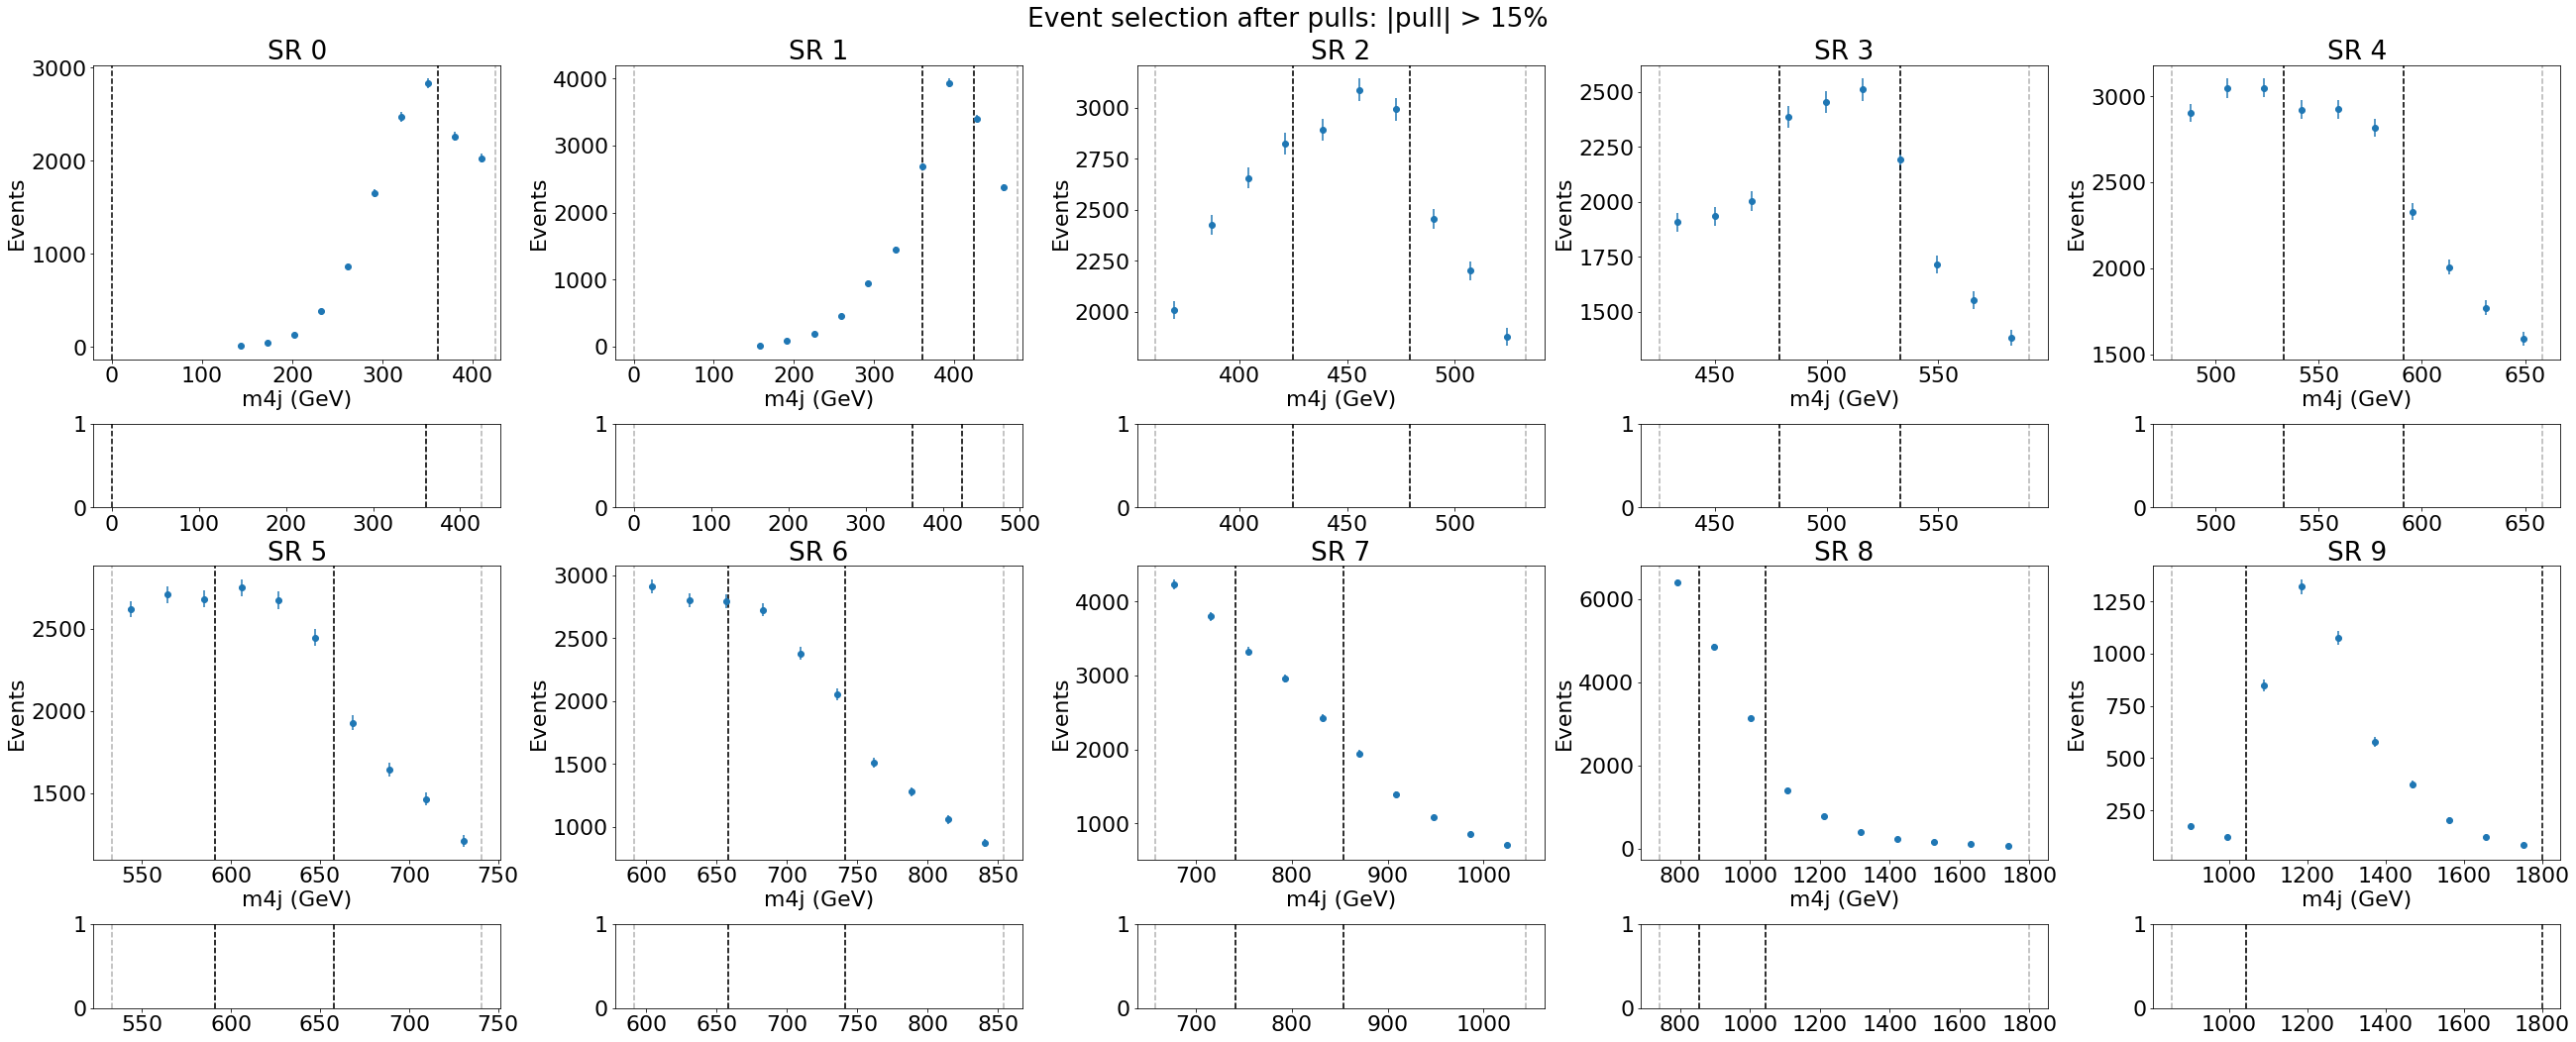

In [38]:

def m4jSubplot(dataMixed, pullAssign, m4jBinEdges,data3b,  percent=15, dijetLim=1000, title=''):#, data4b, data3b):
    percent=15; dijetLim=1000; title='';
    mixPass = getQuantile.dataSel(dataMixed, [0,1800], dijetLim=dijetLim)
    m4j = dataMixed['m4j'][mixPass]; mixWeight = dataMixed['weight'][mixPass]; 
    SRno = dataMixed['SR'][mixPass]
    
    data3b = dataMix; pull3b = pullAssign
    pass3b = getQuantile.dataSel(data3b, [0,1800], dijetLim=dijetLim)
    m4j3b = data3b['m4j'][pass3b]; weight3b = data3b['weight'][pass3b]*wDtoM3b[pass3b]####multiply dToM; 
    SRno3b = data3b['SR'][pass3b]
    
    
    
    plt.rcParams.update({'font.size': 22})
    figf, axs = plt.subplots(4, 5, figsize=(36,14.5), gridspec_kw={'width_ratios': [1,1,1,1,1], 'height_ratios': [7,2, 7,2]}, constrained_layout=True)
    figf.suptitle('Event selection after pulls: |pull| > '+str(percent)+'%')
    bins = 10
    for SR in range(len(m4jBinEdges)):
        pull = pullAssign['pullSR'+str(SR)][mixPass]
        i,j = (int(SR/5)*2), SR%5
        pullVal = np.loadtxt('quantileData/pullArrAbs'+str(percent)+'.txt')[SR]

        if SR == 0:
            pull = pullAssign['pullSR'+str(SR)][mixPass][(SRno==SR) | (SRno==int(SR+1))]
            pulSel = np.where(abs(pull)>=pullVal)[0]
            bincount, binbound = np.histogram(m4j[(SRno==SR) | (SRno==int(SR+1))][pulSel], bins=bins, weights = mixWeight[(SRno==SR) | (SRno==int(SR+1))][pulSel])
        elif SR == 9:
            pull = pullAssign['pullSR'+str(SR)][mixPass][(SRno==SR) | (SRno==int(SR-1))]
            pulSel = np.where(abs(pull)>=pullVal)[0]
            bincount, binbound = np.histogram(m4j[(SRno==int(SR-1)) | (SRno==SR)][pulSel], bins=bins, weights = mixWeight[(SRno==int(SR-1)) | (SRno==SR)][pulSel])
        else:    
            pull = pullAssign['pullSR'+str(SR)][mixPass][(SRno==int(SR-1)) | (SRno==SR) | (SRno==int(SR+1))]
            pulSel = np.where(abs(pull)>=pullVal)[0]
            bincount, binbound = np.histogram(m4j[(SRno==int(SR-1)) | (SRno==SR) | (SRno==int(SR+1))][pulSel], bins=bins, weights = mixWeight[(SRno==int(SR-1)) | (SRno==SR) | (SRno==int(SR+1))][pulSel])

        bincenter = 0.5*(binbound[:-1] + binbound[1:])
        axs[i, j].errorbar(bincenter, bincount, yerr=np.sqrt(bincount), marker='o', label=str(percent)+'%', ls='none')
#         axs[i, j].title('(Absolute pull cuts) SR '+str(SR) + ': m4j: '+str(m4jBinEdges[SR][0])+'-'+str(m4jBinEdges[SR][1])+' GeV ' + title)
    
        axs[i, j].set_title('SR '+ str(SR))#+": selection "+ str(np.round(percent,0)) +"%" )
        axs[i, j].set_xlabel('m4j (GeV)'); axs[i, j].set_ylabel('Events')
        for s in range(2):
            axs[i, j].axvline(m4jBinEdges[SR][s],color='k',linestyle='--')
            axs[i+1, j].axvline(m4jBinEdges[SR][s],color='k',linestyle='--')
            if SR > 0:
                axs[i, j].axvline(m4jBinEdges[SR-1][s],color='k',linestyle='--', alpha=0.3)
                axs[i+1, j].axvline(m4jBinEdges[SR-1][s],color='k',linestyle='--', alpha=0.3)
            if SR < 9:
                axs[i, j].axvline(m4jBinEdges[SR+1][s],color='k',linestyle='--', alpha=0.3)
                axs[i+1, j].axvline(m4jBinEdges[SR+1][s],color='k',linestyle='--', alpha=0.3)
#     axs[i, j].set_xlim(left=0, right=ulim); axs[i, j].set_ylim(bottom=0, top=ulim)
    plt.savefig('test.jpg'); plt.show();plt.close()
    
m4jSubplot(dataMixed, pullAssign, m4jBinEdges)

In [25]:
f = np.load('quantileData/quantBins_1.npy')

In [26]:
f

array([[[   0.        ,   66.33860571],
        [   0.        ,   48.74436403]],

       [[   0.        ,   66.33860571],
        [  48.74436403,   57.66462791]],

       [[  66.33860571,   85.04009294],
        [   0.        ,   48.63449636]],

       ...,

       [[ 226.11477901,  234.56723982],
        [ 163.68355476, 1000.        ]],

       [[ 234.56723982, 1000.        ],
        [ 153.44358208,  160.75774718]],

       [[ 234.56723982, 1000.        ],
        [ 160.75774718, 1000.        ]]])

In [29]:
f[0]

array([[ 0.        , 66.33860571],
       [ 0.        , 48.74436403]])

In [49]:
(g[1][0], g[1][1]), (g[2][0], g[2][1]) 

(0.0, 1.8)

In [48]:
g[0][0] #### g(x,y)

array([0., 0., 1., 1., 0.])

In [50]:
k = []
for i in range(5):
    for j in range(5):
        k.append([[g[1][i], g[1][i+1]],[g[2][j]], g[2][j+1]] )
k

[[[0.0, 1.8], [0.129934219712452], 0.2832030507823993],
 [[0.0, 1.8], [0.2832030507823993], 0.43647188185234664],
 [[0.0, 1.8], [0.43647188185234664], 0.589740712922294],
 [[0.0, 1.8], [0.589740712922294], 0.7430095439922413],
 [[0.0, 1.8], [0.7430095439922413], 0.8962783750621887],
 [[1.8, 3.6], [0.129934219712452], 0.2832030507823993],
 [[1.8, 3.6], [0.2832030507823993], 0.43647188185234664],
 [[1.8, 3.6], [0.43647188185234664], 0.589740712922294],
 [[1.8, 3.6], [0.589740712922294], 0.7430095439922413],
 [[1.8, 3.6], [0.7430095439922413], 0.8962783750621887],
 [[3.6, 5.4], [0.129934219712452], 0.2832030507823993],
 [[3.6, 5.4], [0.2832030507823993], 0.43647188185234664],
 [[3.6, 5.4], [0.43647188185234664], 0.589740712922294],
 [[3.6, 5.4], [0.589740712922294], 0.7430095439922413],
 [[3.6, 5.4], [0.7430095439922413], 0.8962783750621887],
 [[5.4, 7.2], [0.129934219712452], 0.2832030507823993],
 [[5.4, 7.2], [0.2832030507823993], 0.43647188185234664],
 [[5.4, 7.2], [0.43647188185234664

In [51]:
g[0].reshape(-1)

array([0., 0., 1., 1., 0., 0., 0., 2., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0.])

In [58]:
a = np.load('quantileData/ZH4b_histPullBinCont_9.npy')
len(a)

10000

In [62]:
b = np.load('quantileData/ZH4b_histBins_9.npy')#, allow_pickle=True)
b

array([[[   0.,   18.],
        [   0.,   18.]],

       [[   0.,   18.],
        [  18.,   36.]],

       [[   0.,   18.],
        [  36.,   54.]],

       ...,

       [[1782., 1800.],
        [1746., 1764.]],

       [[1782., 1800.],
        [1764., 1782.]],

       [[1782., 1800.],
        [1782., 1800.]]])

In [44]:
g

(array([[0., 0., 1., 1., 0.],
        [0., 0., 2., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1.],
        [1., 1., 0., 0., 0.]]),
 array([0. , 1.8, 3.6, 5.4, 7.2, 9. ]),
 array([0.12993422, 0.28320305, 0.43647188, 0.58974071, 0.74300954,
        0.89627838]),
 <matplotlib.collections.QuadMesh at 0x7f57da184910>)

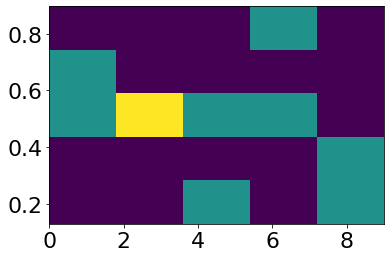

In [43]:
g = plt.hist2d(np.arange(10), np.random.rand(10), bins=5);# plt.colorbar() ## x-binedges, y-binedges, 

In [22]:
for i in range(10):
    print((int(i/5)*2), i%5, " ", (int(i/5)*2)+1, i%5)

0 0   1 0
0 1   1 1
0 2   1 2
0 3   1 3
0 4   1 4
2 0   3 0
2 1   3 1
2 2   3 2
2 3   3 3
2 4   3 4


In [4]:
m4jBinEdges = np.array([[0, 361], [361, 425], [425, 479], [479, 533], [533, 591], [591, 658], [658, 741], [741, 854], [854, 1044], [1044, 1800]])
arrayNames = ['weight',"passHLT","leadStM","sublStM","m4j", 'nSelJets','SR']
dataFilename = "root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"mixed2018_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef.root"
sigFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/ZH4b"+y+"_picoAOD.root" for y in ['2016','2017','2018']]
mcPseudoTagWeight = 'weight'

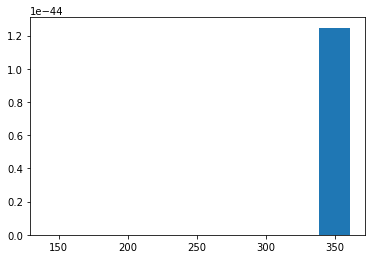

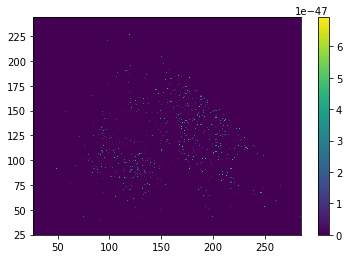

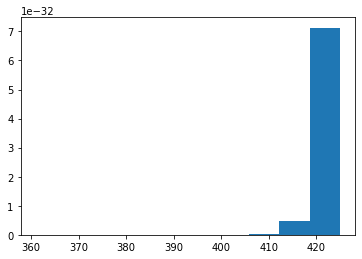

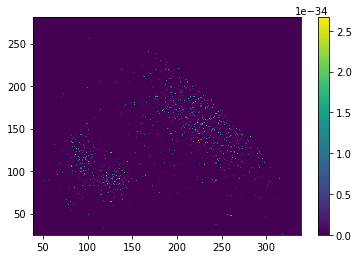

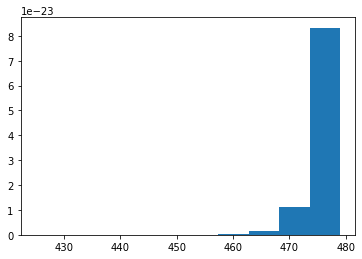

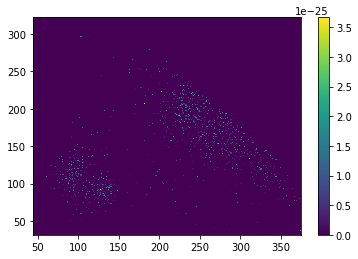

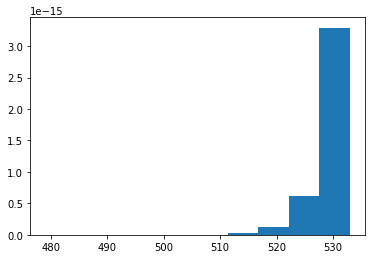

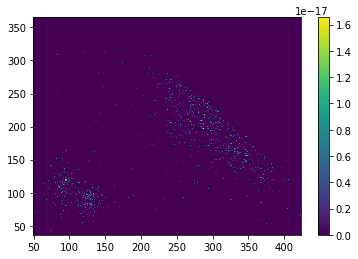

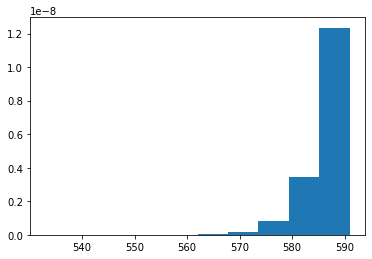

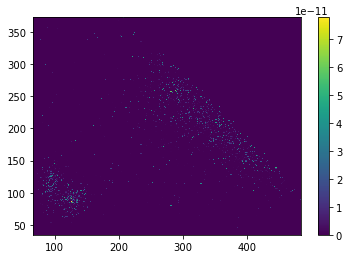

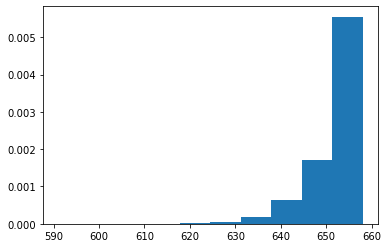

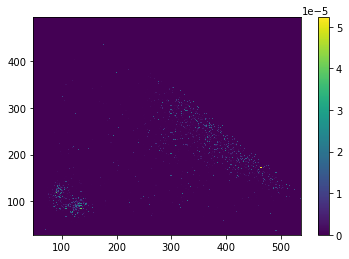

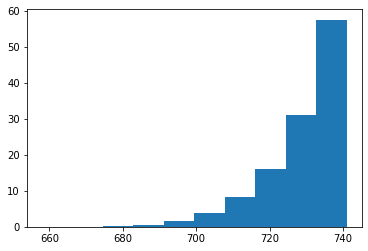

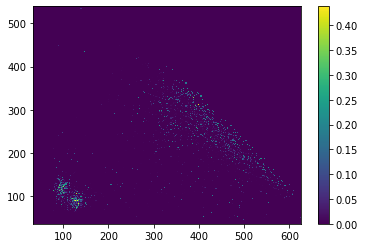

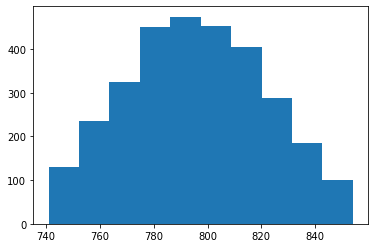

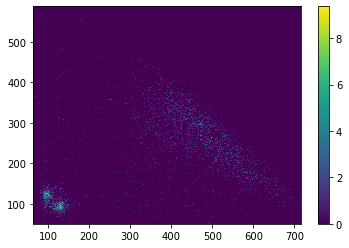

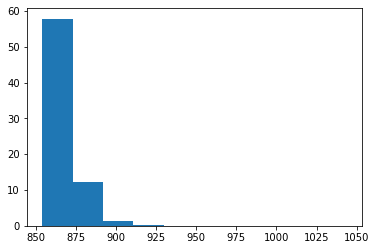

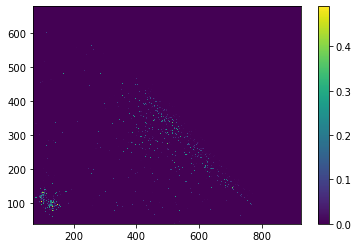

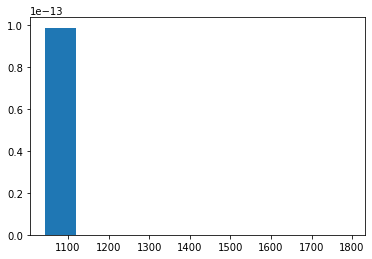

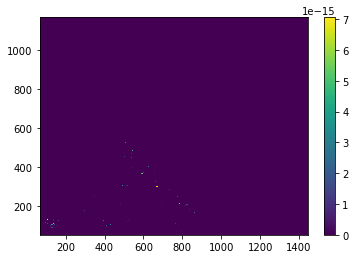

In [14]:
mixEventCount = [115186.0, 111388.0, 161797.0]
def gaus(x, mu, sigma):
    return np.exp(-0.5*((x-mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))

for s,sigFile in enumerate(sigFilename):
    sigF   = uproot.open(sigFile)['Events']
    sig       = sigF.arrays(arrayNames)
    sigPass = dataSel(sig, [m4jBinEdges[0][0], m4jBinEdges[-1][1]])
    sigWSum = np.sum(np.array(sig[mcPseudoTagWeight][sigPass]),dtype=np.float32)
    sigFactor = float(2)*0.01*mixEventCount[s]
    gausScale = gaus(sig['m4j'][sigPass], mu=800, sigma=30)
    sigRescale = np.zeros(len(sigPass))
    sigRescale[sigPass] = sigFactor * gausScale/np.sum(np.array(gausScale), dtype=np.float32)
#     sig[mcPseudoTagWeight] = sigRescale
#     np.save('gausWeight'+str(2016+s), sigRescale)
#     plt.hist(sig['m4j'], weights=sigRescale); plt.show(); plt.close()
#     plt.hist2d(sig['leadStM'],sig['sublStM'], weights=sigRescale, bins=250); plt.show(); plt.close()
for SR in range(10):    
    plt.hist(sig['m4j'][sig['SR'] == SR], weights=sigRescale[sig['SR'] == SR]); plt.show(); plt.close()
    plt.hist2d(sig['leadStM'][sig['SR'] == SR],sig['sublStM'][sig['SR'] == SR], weights=sigRescale[sig['SR'] == SR], bins=250);plt.colorbar(); plt.show(); plt.close()

(array([2.68793555e-032, 4.34851653e+000, 3.23159149e+003, 1.32957297e-007,
        1.41480223e-053, 1.03785513e-142, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]),
 array([ 140.20605343,  422.47891923,  704.75178503,  987.02465083,
        1269.29751663, 1551.57038243, 1833.84324823, 2116.11611403,
        2398.38897983, 2680.66184563, 2962.93471143]),
 <BarContainer object of 10 artists>)

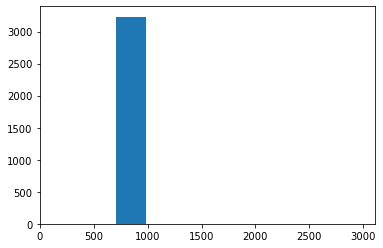

In [8]:
plt.hist(sig['m4j'], weights=sigRescale)

In [9]:
a = np.load('gausWeight'+str(2016)+'.npy')
b = np.load('gausWeight'+str(2017)+'.npy')

In [15]:
np.concatenate((b,a))

array([2.96599994e-07, 2.84064051e-11, 1.25468902e-40, ...,
       2.06858020e-40, 1.33432847e-18, 0.00000000e+00])

In [16]:
dataFile   = uproot.open(dataFilename)['Events']
data       = dataFile.arrays(arrayNames)

In [17]:
def gaus(x, mu, sigma):
    return np.exp(-0.5*((x-mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))

In [18]:
sigFile   = uproot.open(sigFilename)['Events']
sig       = sigFile.arrays(arrayNames)
# print(sig['weight'])
# plt.hist(sig['weight'])

In [19]:
m4jPass = dataSel(data,[m4jBinEdges[0][0], m4jBinEdges[-1][1]])
mcPsdoTagWSum = np.sum(np.array(data[mcPseudoTagWeight][m4jPass]),dtype=np.float32)
sigPass = dataSel(sig, [m4jBinEdges[0][0], m4jBinEdges[-1][1]])
sigWSum = np.sum(np.array(sig[mcPseudoTagWeight][sigPass]),dtype=np.float32)

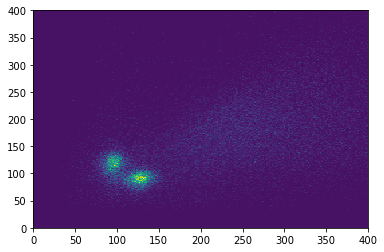

In [20]:
plt.hist2d(sig['leadStM'][sigPass], sig['sublStM'][sigPass], weights = sig['weight'][sigPass], bins=250, range=[[0,400],[0,400]])
plt.show()

In [21]:
mcPsdoTagWSum

161797.0

27.093479221532967
3235.9400077679734


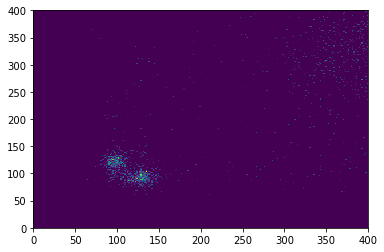

In [26]:
sigFactor = float('2')*0.01*mcPsdoTagWSum
sigRescale = np.zeros(len(sigPass))
# sigRescale[sigPass] = sigFactor * sig[mcPseudoTagWeight][sigPass]/sigWSum
gausScale = gaus(sig['m4j'][sigPass], mu=800, sigma=30)
print(sum(gausScale))
sigRescale[sigPass] = sigFactor * gausScale/np.sum(np.array(gausScale), dtype=np.float32)
print(sum(sigRescale))
sig[mcPseudoTagWeight] = sigRescale

plt.hist2d(sig['leadStM'][sigPass], sig['sublStM'][sigPass], weights = sig['weight'][sigPass], bins=250, range=[[0,400],[0,400]])
plt.show()

In [23]:
print(sum(sig['weight'][sigPass])*100)
print(sum(data['weight'][m4jPass]))
p = ak.concatenate((data, sig))

323594.00077679736
161797.0


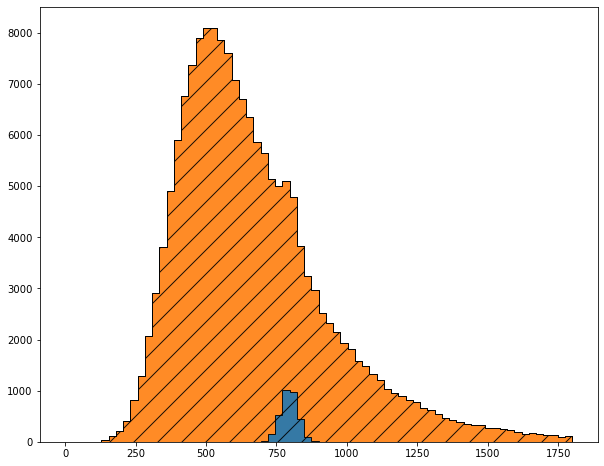

In [24]:
plt.figure(figsize=(10,8))
plt.hist([sig['m4j'],data['m4j']], weights = [sig['weight'], data['weight']], range=(0,1800), bins = 70,fill=True, alpha = 0.9 , stacked=True, histtype='step', edgecolor='k')
plt.hist(p['m4j'], weights =  p['weight'], range=(0,1800), bins = 70, alpha = 0.9, histtype='step', edgecolor='k',hatch='/', fill=False)
# plt.hist(, range=(0,1800), bins = 70, weights = sig['weight'])
plt.show()

[0.000489, 0.000491, 4.76e-05, 0.000226, ... 0.000383, 0.00032, 0.000154, 0.000252]


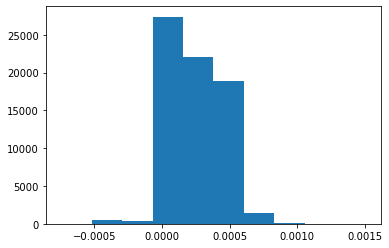

In [7]:
sigFile   = uproot.open(sigFilename)['Events']
sig       = sigFile.arrays(arrayNames)
print(sig['weight'])
plt.hist(sig['weight'])
m4jPass = dataSel(data,[m4jBinEdges[0][0], m4jBinEdges[-1][1]])
mcPsdoTagWSum = np.sum(np.array(data[mcPseudoTagWeight][m4jPass]),dtype=np.float32)
sigPass = dataSel(sig, [m4jBinEdges[0][0], m4jBinEdges[-1][1]])
sigWSum = np.sum(np.array(sig[mcPseudoTagWeight][sigPass]),dtype=np.float32)
sigFactor = float('5')*0.01*mcPsdoTagWSum/sigWSum
sigRescale = np.zeros(len(sigPass))
sigRescale[sigPass] = sigFactor * sig[mcPseudoTagWeight][sigPass]
sig[mcPseudoTagWeight] = sigRescale

In [25]:
p = ak.concatenate((data, sig))

In [24]:
print(sum(sig['weight'][sigPass])*20)
print(sum(data['weight'][m4jPass]))

111387.99855808279
111388.0


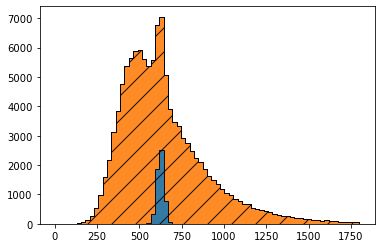

In [26]:
plt.hist([sig['m4j'],data['m4j']], weights = [sig['weight'], data['weight']], range=(0,1800), bins = 70,fill=True, alpha = 0.9 , stacked=True, histtype='step', edgecolor='k')
plt.hist(p['m4j'], weights =  p['weight'], range=(0,1800), bins = 70, alpha = 0.9, histtype='step', edgecolor='k',hatch='/', fill=False)
# plt.hist(, range=(0,1800), bins = 70, weights = sig['weight'])
plt.show()

In [10]:
outputfile = "picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_Had2017_wkdt.root"
outputfile = outputfile.split("wkdt.root")[0]+"ZH4b_"+str('5')+"percent_wkdt.root"
outputfile

'picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_Had2017_ZH4b_5percent_wkdt.root'

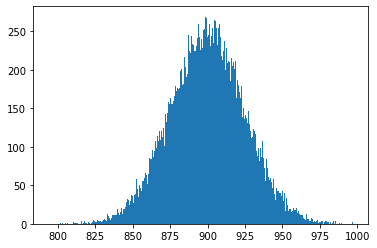

In [11]:
s = np.sort(np.random.normal(900,25, size = len(sig[sigPass])))
plt.hist(s, bins=700); plt.show(); plt.close()

In [20]:
def gaus(x, mu, sigma):
    return np.exp(-0.5*((x-mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))

0.9999669726134254

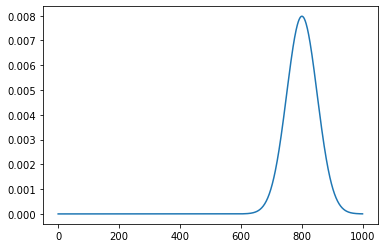

In [27]:
x = np.arange(1000)
g = gaus(x, 800,50)
plt.plot(x,g)
sum(g)

In [16]:
sas = np.argsort(sig['m4j'][sigPass])
m, w = sig['m4j'][sigPass][sas], sig['weight'][sigPass][sas]

In [26]:
sum(w)

5569.399879468605

In [29]:
sum(w*gaus(m, 800, 50))

3.1922541474198893

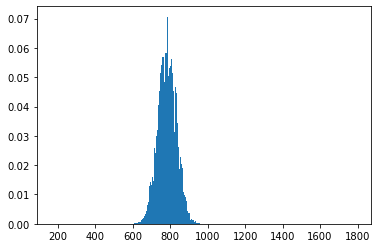

In [23]:
plt.hist(m, bins=700, weights = w*gaus(m, 800, 50)); plt.show();  plt.close()

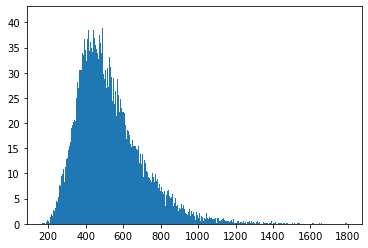

In [17]:
plt.hist(m, bins=700, weights = w); plt.show();  plt.close()

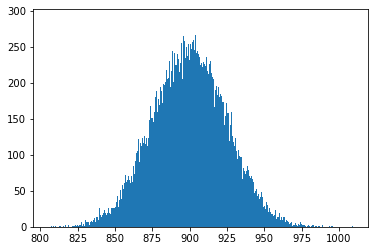

In [48]:

plt.hist(s, bins=700); plt.show();  plt.close()

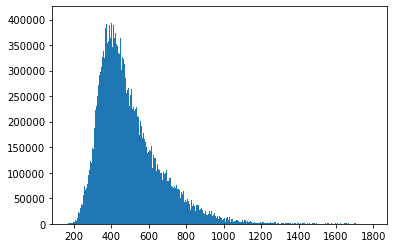

In [49]:

plt.hist(sig[sigPass]['m4j'], bins=700, weights = w/sum(w)); plt.show();  plt.close()

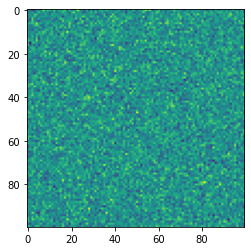

In [18]:
plt.imshow(s)

(array([  4.,  20.,  89., 171., 221., 234., 166.,  72.,  18.,   5.]),
 array([-1.35588151, -0.07195181,  1.21197789,  2.49590759,  3.77983729,
         5.06376699,  6.34769669,  7.63162639,  8.91555609, 10.19948579,
        11.48341549]),
 <BarContainer object of 10 artists>)

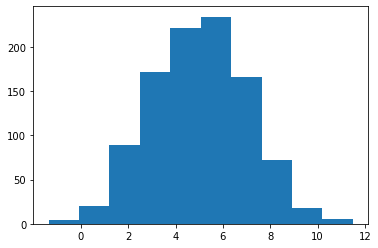

In [24]:
plt.hist(s[:,0])

(array([  3.,  11.,  48., 115., 190., 264., 229.,  88.,  40.,  12.]),
 array([-1.94920033, -0.68230142,  0.58459748,  1.85149639,  3.11839529,
         4.38529419,  5.6521931 ,  6.919092  ,  8.1859909 ,  9.45288981,
        10.71978871]),
 <BarContainer object of 10 artists>)

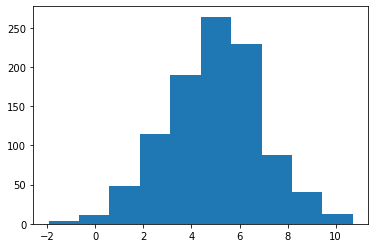

In [25]:
plt.hist(s[:,46])